# Influencia de multiples factores en el rendimiento en enseñanza media.


Durante los últimos años se ha notado un [problema en el desempeño de los estudiantes](https://www.mineduc.cl/impacto-del-covid-19-en-los-resultados-de-aprendizaje-en-chile/), especialmente en contexto de pandemia, que ha traido consigo muchos aspectos negativos y han impactado significativamente las vidas de la población. Un estudio de Mineduc y el Banco de Chile publicado en agosto del año 2020* señala que debido al estado del país durante este período es probable un retroceso de 1,3 años en la escolaridad según aprendizaje de los estudiantes, lo que significa una pérdida importante tanto para establecimientos escolares como para universidades. Estando experimentando esta problemática directamente, fue considerado relevante estudiar las posibles variables que estarían influyendo en el aspecto académico del país, haciendo un énfasis en los bienes por región.

Para lo anterior, a partir de la base de datos de Mineduc y su información respecto al desempeño estudiantil, se analizarán y compararán las relaciones que esto tiene con los ingresos económicos regionales y la cantidad de redes a internet fijas, debido a la relevancia que ambas cosas han adquirido en nuestro contexto. De esa forma, se dará respuesta a las siguientes preguntas:

* ¿Cuáles son las regiones que presentan mayor desempeño académico y cuáles son las diferencias con las que tienen peor rendimiento? ¿Coincide lo anterior con el ingreso que estas presentan?
* ¿Se puede decir que hay una relación lineal entre ambas variables?
* ¿Se puede afirmar que el acceso a internet y los ingresos económicos influyen en los estudiantes?
* ¿Existe alguna conexión además entre el acceso a internet y los ingresos económicos?
* ¿Se puede predecir el desempeño del próximo año a partir de lo observado?


Los datos a utilizar provienen de bases públicas, y tienen distintas características:

El primero es un archivo .csv que se encuentra en la página web de Mineduc, y contiene información de todo tipo del desempeño estudiantil, incluyendo el promedio general anual, la comuna y región de cada estudiante. La mayoría de sus datos son de tipo numérico, incluso los que no tienen un valor específico y en su lugar lo utilizan como representación.

El segundo es un archivo de formato .csv de la Subsecretaría de Comunicaciones que tiene información respecto a las redes de internet fijas en los hogares, clasificadas por año y región. Los elementos son de tipo numérico y es de corta extensión.

Por último, el tercer grupo de datos corresponde a un archivo .xlsx de la encuesta Casen que contiene información sobre el ingreso promedio de los hogares por región, con 7 años registrados a partir del 2006. Al ser ingresos monetarios, al igual que los datos anteriores, estos también son de tipo numérico.

## Importación de librerías:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
#%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Limpieza de datos

### Ingresos de los hogares por región

#### Eliminación y cambio de nombre de columnas

In [3]:
excel = pd.read_excel('Propuesta/Ingreso_Casen_en_Pandemia_2020.xlsx', '3')
excel.head(6)

,Indice,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ingreso promedio de los hogares por tipo de in...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Ingreso promedio de los hogares por tipo de in...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2006-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,($ noviembre de cada año),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,($ noviembre 2020),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,2006.0,2009.0,2011.0,2013.0,2015.0,2017.0,2020.0,...,NaN,NaN,NaN,2006.0,2009.0,2011.0,2013.0,2015.0,2017.0,2020.0


In [4]:
# Debido a que el dataframe comienza bajo las primeras filas,
# se renombran los índices y se eliminan los espacios sin información.

names = []
for a in excel.keys():
    names.append(str(excel[a][5])[0:4])

dicti = {}
cont = 0
for a in excel.keys():
    if cont == 0 or cont == 1:
        dicti[a] = ''
    else:
        dicti[a] = names[cont]
    cont += 1
excel = excel.rename(dicti, axis = 'columns')

In [5]:
excel.columns.duplicated()

array([False,  True, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [6]:
excel_3 = excel
excel_3 = excel_3.iloc[:,~excel_3.columns.duplicated(keep = 'last')]

In [7]:
excel_3 = excel_3.drop(excel_3.index[[0, 1, 2, 3, 4, 5, 6]])

In [8]:
datadata = excel_3[0:138]
datadata=datadata.reset_index()
datadata = datadata.drop('index', axis = 'columns')


In [9]:
# Se eliminan datos nulos.
datadata = datadata.drop('nan', axis = 'columns')
cont = 0
for item in datadata[''].isna():
    if item == True:
        datadata = datadata.drop(cont)
    cont+=1
datadata = datadata.reset_index()
datadata = datadata.drop('index', axis = 'columns')


In [10]:
# Como solo se ocuparán los datos del año 2020, no eliminamos pero descartamos el resto.
ab = datadata['2020'][51::]
cont = 0
for item in ab:
    ab[cont] = int(round(item))
    cont+=1
ab = ab.reset_index()
ingresos_df = pd.DataFrame(ab[0:16])
ingresos_df = ingresos_df.drop('index', axis = 'columns')
ingresos_df.index = np.arange(1, len(ingresos_df)+1)
# Se ordenan las regiones por número.
ingresos_df = ingresos_df.reindex([2, 3, 4, 5, 6, 8, 9, 11, 12, 14, 15, 16, 7, 13, 1, 10])
ingresos_df.index = np.arange(1, len(ingresos_df)+1)
ingresos_df.head(6)

,2020
1,9.695093e+05
2,1.110884e+06
3,8.918012e+05
4,7.519408e+05
5,8.303637e+05
6,7.830949e+05


### Rendimiento estudiantil

In [11]:
dat=pd.read_csv('Propuesta/20210223_Rendimiento_2020_20210131_WEB.csv',delimiter=';')
dat.head(4)

,AGNO,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,...,COD_COM_ALU,NOM_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R,COD_MEN
0,2020,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,"6,7",100,P,P,0
1,2020,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,"5,5",100,P,P,0
2,2020,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,0,0,Y,Y,0
3,2020,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,"5,2",100,P,P,0


In [12]:
len(dat)

3164534

In [13]:
cols=dat.columns
for c in cols:
    print(c)

AGNO
RBD
DGV_RBD
NOM_RBD
COD_REG_RBD
NOM_REG_RBD_A
COD_PRO_RBD
COD_COM_RBD
NOM_COM_RBD
COD_DEPROV_RBD
NOM_DEPROV_RBD
COD_DEPE
COD_DEPE2
RURAL_RBD
ESTADO_ESTAB
COD_ENSE
COD_ENSE2
COD_GRADO
LET_CUR
COD_JOR
COD_TIP_CUR
COD_DES_CUR
MRUN
GEN_ALU
FEC_NAC_ALU
EDAD_ALU
COD_REG_ALU
COD_COM_ALU
NOM_COM_ALU
COD_RAMA
COD_SEC
COD_ESPE
PROM_GRAL
ASISTENCIA
SIT_FIN
SIT_FIN_R
COD_MEN


#### Eliminación y cambio de nombre de columnas

In [14]:
keep_cols = ['AGNO', 'RBD', 'NOM_RBD', 'COD_REG_RBD', 'NOM_REG_RBD_A', 'COD_DEPE2',
            'RURAL_RBD', 'COD_ENSE', 'COD_ENSE2', 'COD_GRADO', 'PROM_GRAL', 'SIT_FIN_R', 'ASISTENCIA']
dat = dat[keep_cols]
dat.reset_index(drop=True, inplace=True)

In [15]:
dat.rename(columns={'AGNO': 'AÑO', 'COD_DEPE2': 'COD_DEPENDENCIA', 'COD_ENSE': 'COD_ENSEÑANZA',
                   'COD_ENSE2': 'COD_ENSEÑANZA2', 'SIT_FIN_R': 'SIT_FINAL'}, inplace=True)
print(len(dat))
dat['AÑO'].unique()

3164534


array([2020], dtype=int64)

In [16]:
dat.drop('AÑO',axis = 1, inplace=True)

In [17]:
# Ciclo que recorre una lista con los códigos de grados de enseñanza básica
for cod in [110, 160, 161, 163, 165, 167]:
    # Se eliminan todos los registros con el código "cod" de la iteración
    dat=dat[dat['COD_ENSEÑANZA'] != cod]
dat.reset_index(drop=True, inplace=True)
len(dat)

1060244

In [18]:
# Ciclo que recorre una lista con los códigos de grados de enseñanza básica
for cod in [6, 8]:
    # Se eliminan todos los registros con el código "cod" de la iteración
    dat=dat[dat['COD_ENSEÑANZA2'] != cod]
dat.reset_index(drop=True, inplace=True)
len(dat)

933871

#### Datos faltantes

In [19]:
dat = dat.replace(' ', np.nan)
dat.isna().sum()

RBD                  0
NOM_RBD              0
COD_REG_RBD          0
NOM_REG_RBD_A        0
COD_DEPENDENCIA      0
RURAL_RBD            0
COD_ENSEÑANZA        0
COD_ENSEÑANZA2       0
COD_GRADO            0
PROM_GRAL            0
SIT_FINAL          141
ASISTENCIA           0
dtype: int64

In [20]:
dat['SIT_FINAL'].unique()

array(['P', 'T', 'R', 'Y', nan], dtype=object)

In [21]:
data = pd.get_dummies(data=dat, columns=['SIT_FINAL'])
data.head(4)

,RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_DEPENDENCIA,RURAL_RBD,COD_ENSEÑANZA,COD_ENSEÑANZA2,COD_GRADO,PROM_GRAL,ASISTENCIA,SIT_FINAL_P,SIT_FINAL_R,SIT_FINAL_T,SIT_FINAL_Y
0,1,LICEO POLITECNICO ARICA,15,AYP,5,0,510,7,1,"6,2",92,1,0,0,0
1,1,LICEO POLITECNICO ARICA,15,AYP,5,0,510,7,1,"6,8",91,1,0,0,0
2,1,LICEO POLITECNICO ARICA,15,AYP,5,0,510,7,1,"4,4",85,1,0,0,0
3,1,LICEO POLITECNICO ARICA,15,AYP,5,0,510,7,1,0,0,0,0,1,0


In [22]:
keep_cols2 = ['RBD', 'NOM_RBD', 'COD_REG_RBD', 'NOM_REG_RBD_A', 'COD_DEPENDENCIA',
            'RURAL_RBD', 'COD_ENSEÑANZA', 'COD_ENSEÑANZA2', 'COD_GRADO', 'SIT_FINAL_P', 'SIT_FINAL_R', 'ASISTENCIA', 'PROM_GRAL']
data = data[keep_cols2]
data.reset_index(drop=True, inplace=True)

In [23]:
data['SIT_FINAL_P'].value_counts()

1    883117
0     50754
Name: SIT_FINAL_P, dtype: int64

In [24]:
data['COD_REG_RBD'].unique()

array([15,  1,  2,  3,  4,  5,  6,  7, 16,  8,  9, 14, 10, 11, 12, 13],
      dtype=int64)

In [25]:
a = pd.DataFrame(data.groupby('COD_REG_RBD')['SIT_FINAL_P'].sum())

In [26]:
b = pd.DataFrame(data['COD_REG_RBD'].value_counts().sort_index())

In [27]:
fin = b.join(a)

In [28]:
# Ya teniendo el dataframe limpio, se suma la cantidad de estudiantes aprobados y reprobados,
# para saber cuál fue el desempeño por región.
# Además, se calcula el porcentaje para tenerlo como referencia.
c = pd.DataFrame(data.groupby('COD_REG_RBD')['SIT_FINAL_R'].sum())
final = fin.join(c)
final = final.drop('COD_REG_RBD', axis = 'columns')
final = final.rename(columns = {'SIT_FINAL_P':'APROBADOS', 'SIT_FINAL_R':'REPROBADOS'})
e = pd.DataFrame(final['REPROBADOS']*100/(final['APROBADOS']+final['REPROBADOS']))
final = final.join(e)
final = final.rename(columns = {0:'%REPROBADOS'})
f = pd.DataFrame(final['APROBADOS']*100/(final['APROBADOS']+final['REPROBADOS']))
final = final.join(f)
final = final.rename(columns = {0:'%APROBADOS'})

desempeño_df = final
desempeño_df.head(6)

,APROBADOS,REPROBADOS,%REPROBADOS,%APROBADOS
1,18673.0,292.0,1.539678,98.460322
2,32874.0,577.0,1.724911,98.275089
3,15810.0,481.0,2.952550,97.047450
4,40225.0,444.0,1.091741,98.908259
5,87942.0,1367.0,1.530641,98.469359
6,47991.0,1322.0,2.680835,97.319165


In [29]:
# Una vez que los datos están separados por región y tenemos una suma acumulativa, 
# agregamos nuevamente a los estudiantes, de modo que cada fila tenga datos específicos y generales,
# lo que facilita el análisis.

#col_drop = ['RBD', 'NOM_REG_RBD_A', 'COD_DEPENDENCIA', 'RURAL_RBD', 'COD_ENSEÑANZA', 'COD_ENSEÑANZA2', 'COD_GRADO']
final_2 = data[['COD_REG_RBD', 'SIT_FINAL_P', 'SIT_FINAL_R', 'ASISTENCIA', 'PROM_GRAL']]
final_2.rename(columns = {'SIT_FINAL_P':'APRUEBA', 'SIT_FINAL_R':'REPRUEBA', 'COD_REG_RBD': 'REGION', 'PROM_GRAL': 'PROMEDIO'}, inplace = True)
final_2['PROMEDIO'] = final_2['PROMEDIO'].apply(lambda x: float(x.replace(',', '.')))
final_2.head(4)

,REGION,APRUEBA,REPRUEBA,ASISTENCIA,PROMEDIO
0,15,1,0,92,6.2
1,15,1,0,91,6.8
2,15,1,0,85,4.4
3,15,0,0,0,0.0


In [30]:
final_3 = pd.merge(final_2, final, how = 'left', left_on = 'REGION', right_index = True)
final_3.head()

,REGION,APRUEBA,REPRUEBA,ASISTENCIA,PROMEDIO,APROBADOS,REPROBADOS,%REPROBADOS,%APROBADOS
0,15,1,0,92,6.2,12824.0,170.0,1.308296,98.691704
1,15,1,0,91,6.8,12824.0,170.0,1.308296,98.691704
2,15,1,0,85,4.4,12824.0,170.0,1.308296,98.691704
3,15,0,0,0,0.0,12824.0,170.0,1.308296,98.691704
4,15,1,0,89,5.9,12824.0,170.0,1.308296,98.691704


### Redes fijas en los hogares

#### Eliminación y cambio de nombre de columnas

In [31]:
excel = pd.read_excel('Propuesta/1_SERIES_CONEXIONES_INTERNET_FIJA_JUN21_030821.xlsx', '7.7.1.CO_TEC_RG_EMP_FIJAS')
excel.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60
0,NaN,SERVICIO ACCESO A INTERNET: CONEXIONES FIJAS P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,<< VOLVER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Al igual que en el primer dataframe, la información no está contenida en las primeras filas, 
# por lo que se eliminan y se renombran los índices.
excel = excel.drop(excel.index[[0, 1, 2, 3, 4, 5]])

In [33]:
names = []
for a in excel.keys():
    names.append(str(excel[a][6]))

dicti = {}
cont = 0
for a in excel.keys():
    if cont == 0 or cont == 1:
        dicti[a] = ''
    else:
        dicti[a] = names[cont]
    cont += 1
excel = excel.rename(dicti, axis = 'columns')
excel.head()

,,,Región,Entel-Chile S.A.,CMET,Telsur,Movistar,CTR,Entelphone,GTD Manquehue,...,Entelphone,RTC,STEL Access,Claro Serv. Empresariales,Netline,Austro Internet,Netglobalis,Hughesnet,Total Otras Conexiones Inalámbricas,Total Conexiones
6,NaN,NaN,Región,Entel-Chile S.A.,CMET,Telsur,Movistar,CTR,Entelphone,GTD Manquehue,...,Entelphone,RTC,STEL Access,Claro Serv. Empresariales,Netline,Austro Internet,Netglobalis,Hughesnet,Total Otras Conexiones Inalámbricas,Total Conexiones
7,NaN,NaN,1,386,NaN,NaN,1437,NaN,521,13,...,2895,NaN,NaN,8,NaN,NaN,NaN,170,3197,75556
8,NaN,NaN,2,291,NaN,NaN,2520,NaN,247,6,...,5662,NaN,NaN,4,NaN,NaN,NaN,898,7156,163835
9,NaN,NaN,3,117,NaN,NaN,4067,NaN,109,NaN,...,1794,NaN,NaN,3,NaN,NaN,NaN,811,3036,58053
10,NaN,NaN,4,301,NaN,NaN,6694,NaN,344,6,...,7534,NaN,NaN,NaN,NaN,NaN,NaN,1345,10630,157504


In [34]:
# Como para el análisis no nos interesa saber de dónde provienen las redes, es decir, su empresa de origen,
# solo mantenemos el total de conexiones por región.
excel2 = pd.DataFrame(excel['Región'])
excel2 = excel2.join(excel['Total Conexiones'])
excel2 = excel2.reset_index()
excel2 = excel2.drop('index', axis = 'columns')
excel2 = excel2.drop(0)
redes_df = excel2[0:17]
redes_df.head(4)


,Región,Total Conexiones
1,1,75556
2,2,163835
3,3,58053
4,4,157504


## Dataframe final

In [35]:
# Unimos los dataframe anteriores por su columna en común, las regiones,

a = redes_df.join(desempeño_df)
b= a.join(ingresos_df)
b = b.rename(columns = {'2020':'Ingresos totales'})
b['APROBADOS'][17] = b['APROBADOS'].sum()
b['REPROBADOS'][17] = b['REPROBADOS'].sum()
b['Región'] = ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX', 'X', 'XI', 'XII','RM', 'XIV', 'XV', 'XVI', 'Total']

dataframe = b[['Región', 'Ingresos totales', 'Total Conexiones', 'APROBADOS', 'REPROBADOS', '%APROBADOS','%REPROBADOS']]
dataframe

,Región,Ingresos totales,Total Conexiones,APROBADOS,REPROBADOS,%APROBADOS,%REPROBADOS
1,I,9.695093e+05,75556,18673.0,292.0,98.460322,1.539678
2,II,1.110884e+06,163835,32874.0,577.0,98.275089,1.724911
3,III,8.918012e+05,58053,15810.0,481.0,97.047450,2.952550
4,IV,7.519408e+05,157504,40225.0,444.0,98.908259,1.091741
5,V,8.303637e+05,447729,87942.0,1367.0,98.469359,1.530641
6,VI,7.830949e+05,157323,47991.0,1322.0,97.319165,2.680835
7,VII,7.435677e+05,172452,55025.0,1520.0,97.311875,2.688125
8,VIII,7.840802e+05,372442,80456.0,1210.0,98.518355,1.481645
9,IX,6.865989e+05,146334,52506.0,1637.0,96.976525,3.023475
10,X,8.001562e+05,140033,44302.0,2437.0,94.785939,5.214061


In [36]:
dataframe_2 = pd.merge(final_3, redes_df['Total Conexiones'], how = 'left', left_on = 'REGION', right_index = True)
dataframe_2 = pd.merge(dataframe_2, dataframe['Ingresos totales'], how = 'left', left_on = 'REGION', right_index = True)
#dataframe_2 = pd.merge(dataframe_2, dataframe[['Región', 'Ingresos totales']], how = 'left', left_on = 'REGION', right_index = True)
dataframe_2

,REGION,APRUEBA,REPRUEBA,ASISTENCIA,PROMEDIO,APROBADOS,REPROBADOS,%REPROBADOS,%APROBADOS,Total Conexiones,Ingresos totales
0,15,1,0,92,6.2,12824.0,170.0,1.308296,98.691704,57791,780099.168628
1,15,1,0,91,6.8,12824.0,170.0,1.308296,98.691704,57791,780099.168628
2,15,1,0,85,4.4,12824.0,170.0,1.308296,98.691704,57791,780099.168628
3,15,0,0,0,0.0,12824.0,170.0,1.308296,98.691704,57791,780099.168628
4,15,1,0,89,5.9,12824.0,170.0,1.308296,98.691704,57791,780099.168628
...,...,...,...,...,...,...,...,...,...,...,...
933866,3,1,0,100,5.8,15810.0,481.0,2.952550,97.047450,58053,891801.218117
933867,3,1,0,100,6.4,15810.0,481.0,2.952550,97.047450,58053,891801.218117
933868,3,1,0,100,5.9,15810.0,481.0,2.952550,97.047450,58053,891801.218117
933869,3,1,0,100,6.0,15810.0,481.0,2.952550,97.047450,58053,891801.218117


In [37]:
# Debido a la gran cantidad de datos en el dataframe, hemos decidido analizar una muestra aleatoria de 19 datos por región,
# resultando en un total de 304 filas.

dataframe_2_sample = dataframe_2.groupby('REGION').sample(n = 19)
dataframe_2_sample.reset_index(drop=True, inplace=True)
dataframe_2_sample.head(6)


,REGION,APRUEBA,REPRUEBA,ASISTENCIA,PROMEDIO,APROBADOS,REPROBADOS,%REPROBADOS,%APROBADOS,Total Conexiones,Ingresos totales
0,1,1,0,100,6.6,18673.0,292.0,1.539678,98.460322,75556,969509.320065
1,1,1,0,85,6.0,18673.0,292.0,1.539678,98.460322,75556,969509.320065
2,1,1,0,85,5.8,18673.0,292.0,1.539678,98.460322,75556,969509.320065
3,1,1,0,94,5.9,18673.0,292.0,1.539678,98.460322,75556,969509.320065
4,1,1,0,89,6.1,18673.0,292.0,1.539678,98.460322,75556,969509.320065
5,1,1,0,100,7.0,18673.0,292.0,1.539678,98.460322,75556,969509.320065


## Análisis exploratorio

Ahora que tenemos los datos limpios y ordenados, el análisis de las variables es más fácil, por lo que se pueden comenzar a formular conclusiones a partir de la observación. 

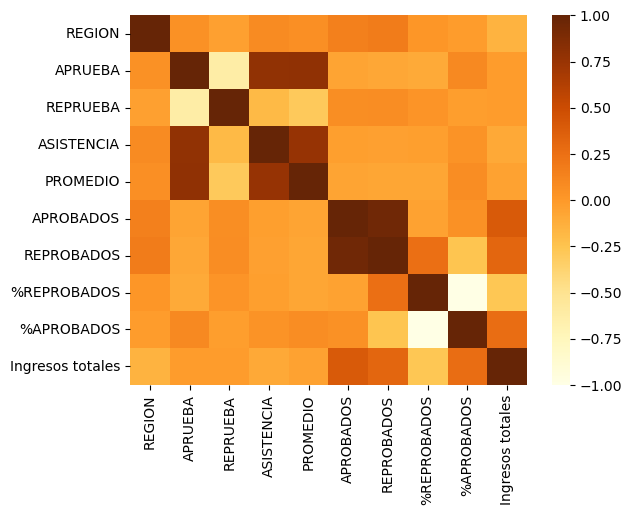

In [38]:
corr_info = dataframe_2_sample.corr()
sns.heatmap(data = corr_info, cmap = 'YlOrBr')
plt.show()

Como se puede apreciar en el mapa de calor, existe una conexión entre los ingresos totales y si el estudiante aprueba, y vale la pena mencionar una relación entre la asistencia a clases y la aprobación del alumno. Estas son interesantes observaciones que deberán seguir siendo analizadas para responder las preguntas objetivo.

In [61]:
g = pd.DataFrame(dataframe_2.groupby('REGION')['PROMEDIO'].mean())
g.rename(columns = {'PROMEDIO':'promedios'})
g = g.join(ingresos_df)
g.head(4)

,PROMEDIO,2020
REGION,,
1,5.724271,9.695093e+05
2,5.628958,1.110884e+06
3,5.602717,8.918012e+05
4,5.712520,7.519408e+05


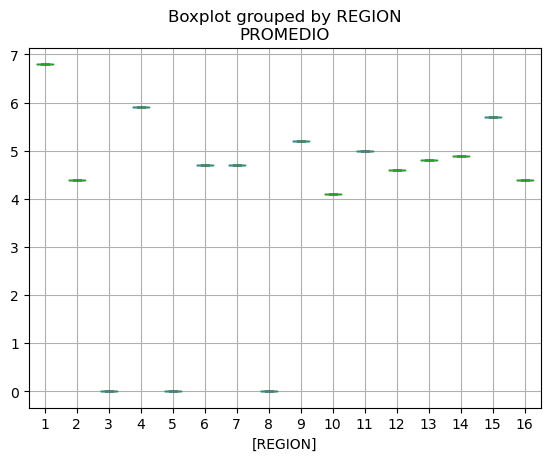

In [63]:
g = pd.DataFrame(dataframe_2['PROMEDIO'], dataframe_2['REGION'])
ax = g.boxplot(by = 'REGION')
plt.show()

Aquí podemos ver que las regiones con mejor desempeño son las de Aysén y Magallanes, mientras que las de peor promedio son Los Lagos y O'Higgins. Se puede apreciar cierta relación con sus ingresos, ya que las dos primeras regiones tienen más bienes por hogar que las segundas, por lo que es interesante tomar estos datos para comprobar la propuesta planteada.

## Clusters

El primer método de modelamiento a utilizar para analizar las relaciones entre variables es clustering, de forma que encontremos similitudes entre las variables y podamos corroborar el análisis anterior, llegando a conclusiones más concretas.

In [41]:
cols_categoricas = ['APRUEBA', 'REPRUEBA'] + [f'REGION_{i}' for i in range(1, 17)]
dataframe_2_v2 = pd.get_dummies(dataframe_2_sample, columns = ['REGION'])
dataframe_2_v2
column_transformer = ColumnTransformer([('scaler', StandardScaler(), [col for col in dataframe_2_v2.columns \
if col not in cols_categoricas])],  remainder = 'passthrough')
column_transformer.fit(dataframe_2_v2)
scaled_data = column_transformer.transform(dataframe_2_v2)

pd.DataFrame(column_transformer.fit_transform(dataframe_2_v2), columns = dataframe_2_v2.columns)

,APRUEBA,REPRUEBA,ASISTENCIA,PROMEDIO,APROBADOS,REPROBADOS,%REPROBADOS,%APROBADOS,Total Conexiones,Ingresos totales,...,REGION_7,REGION_8,REGION_9,REGION_10,REGION_11,REGION_12,REGION_13,REGION_14,REGION_15,REGION_16
0,0.521473,0.669692,-0.480929,-0.611795,-0.597580,0.597580,-0.401457,0.638076,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.287893,0.207696,-0.480929,-0.611795,-0.597580,0.597580,-0.401457,0.638076,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.287893,0.053697,-0.480929,-0.611795,-0.597580,0.597580,-0.401457,0.638076,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.197727,0.130696,-0.480929,-0.611795,-0.597580,0.597580,-0.401457,0.638076,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.072062,0.284695,-0.480929,-0.611795,-0.597580,0.597580,-0.401457,0.638076,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,-0.287893,-0.408300,-0.388119,-0.535892,-0.598362,0.598362,-0.405328,-1.416632,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
300,-0.287893,0.669692,-0.388119,-0.535892,-0.598362,0.598362,-0.405328,-1.416632,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
301,0.521473,0.515694,-0.388119,-0.535892,-0.598362,0.598362,-0.405328,-1.416632,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
302,0.521473,0.900691,-0.388119,-0.535892,-0.598362,0.598362,-0.405328,-1.416632,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [42]:
# estudio de reducción de dimensionalidad de los datos
pca = PCA()
pca.fit(scaled_data)

PCA()

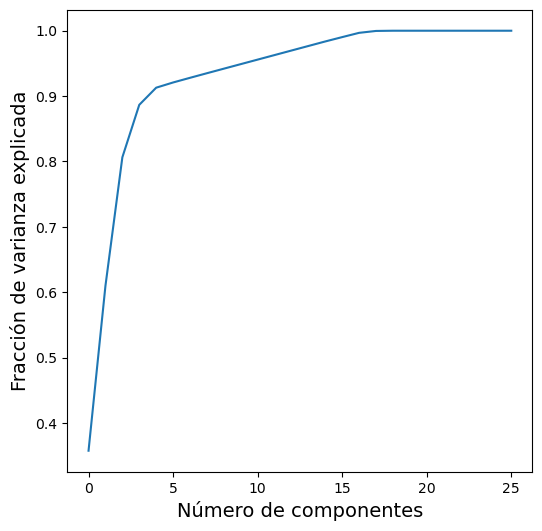

In [43]:
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111)
sns.lineplot(data = np.cumsum(pca.explained_variance_ratio_), ax = ax)
ax.set_xlabel('Número de componentes', fontsize = 14)
ax.set_ylabel('Fracción de varianza explicada', fontsize = 14)
plt.show()

Podemos apreciar que una vez se alcanzan las 15 componentes, la fracción de varianza explicada se vuelve casi constante, indicando que con dicha cantidad de componentes es posile crear un conjunto de datos que al momento de ser utilizado, rinda similar al original.

In [44]:
# modelo con las componentes suficientes
pca_v2 = PCA(n_components = 15)
pca_v2.fit(dataframe_2_v2)
pca_scaled_data = pca_v2.transform(dataframe_2_v2)

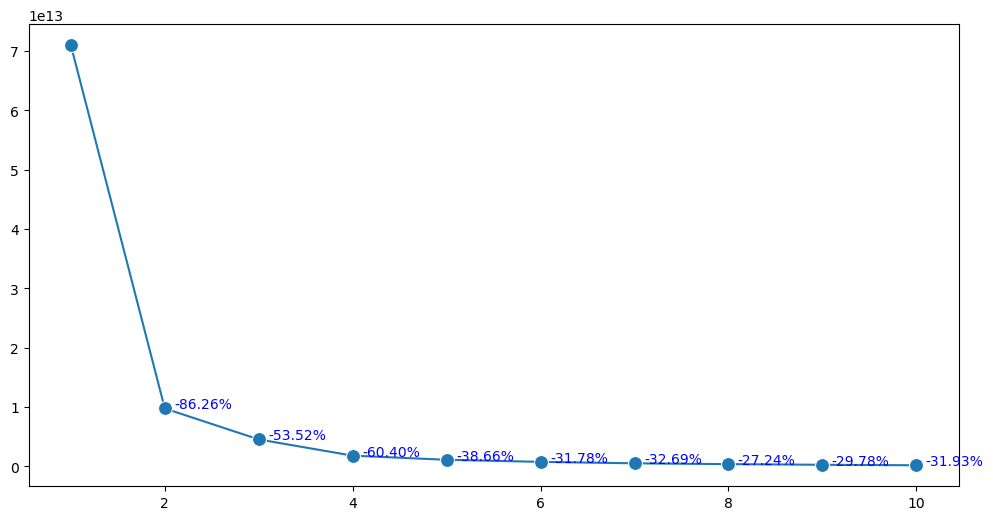

In [45]:
max_clusters = 10 # maximo de clusters y su escala de aumento
inertia, n_clusters = [], [] # listas que almacenara la inercia


for n in range(1, max_clusters + 1):
    KM_model = KMeans(n_clusters = n)
    KM_clusters = KM_model.fit(pca_scaled_data) # ajuste del modelo
    inertia.append(KM_clusters.inertia_) # inercia del modelo
    n_clusters.append(n) # número de clusters

# gráfico comparando número de clusters e inercia
fig, ax = plt.subplots(1, 1, figsize = (12, 6))
sns.lineplot(x = n_clusters, y = inertia, marker = 'o', markersize = 10, ax = ax)

for i in range(1, len(inertia)):
    delta = (inertia[i] - inertia[i - 1]) / inertia[i - 1] * 100
    ax.text(i + 1.1, inertia[i], '%.2f'%delta + '%', color = 'b')
plt.show()

A partir del conjunto de datos con dimensionalidad reducida creamos una serie de modelos de clusterización para encontrar la cantidad de clusters optima a través del método del codo. Como podemos apreciar, el mayor decenso en la inercia se produce entre los 2 a 4 clusters.

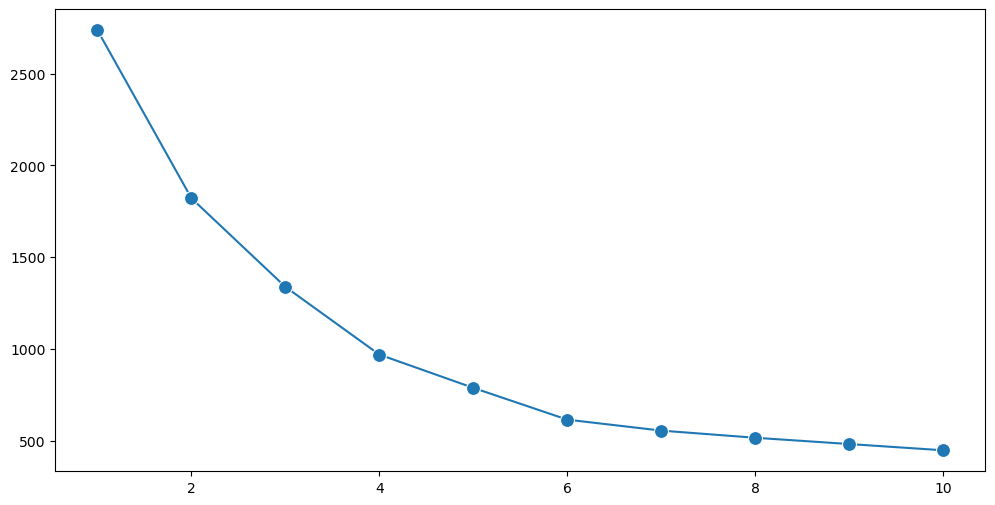

In [46]:
max_clusters = 10 # maximo de clusters y su escala de aumento
inertia, n_clusters = [], [] # listas que almacenara la inercia


for n in range(1, max_clusters + 1):
    KM_model = KMeans(n_clusters = n)
    KM_clusters = KM_model.fit(scaled_data) # ajuste del modelo
    inertia.append(KM_clusters.inertia_) # inercia del modelo
    n_clusters.append(n) # número de clusters

# gráfico comparando número de clusters e inercia
fig, ax = plt.subplots(1, 1, figsize = (12, 6))
sns.lineplot(x = n_clusters, y = inertia, marker = 'o', markersize = 10, ax = ax)

plt.show()

Ahora realizamos el mismo analisis en la cantidad de clusters pero esta vez a partir de modelos creados en base a los datos cuya dimension no ha sido reducida. Obtenemos que entre los 3 a 5 
clusters se produce la mayor redución en la inercia.

In [47]:
n = 3

# ajuste del modelo
KM_model_f = KMeans(n_clusters = n)
np.random.seed(180)

KM_clusters_f = KM_model_f.fit(pca_scaled_data)

df_v2_cls_1  = dataframe_2_v2.copy()
df_v2_cls_1['clusters'] = KM_clusters_f.labels_
df_v2_cls_1_resumen =  df_v2_cls_1[['PROMEDIO', 'APROBADOS', 'REPROBADOS', '%APROBADOS', '%REPROBADOS', 'Ingresos totales', 'ASISTENCIA', 'clusters']].groupby('clusters').mean()
df_v2_cls_1_resumen

,PROMEDIO,APROBADOS,REPROBADOS,%APROBADOS,%REPROBADOS,Ingresos totales,ASISTENCIA
clusters,,,,,,,
0,5.368421,334844.0,6196.0,98.183204,1.816796,1.204524e+06,87.263158
1,5.795263,46745.3,1112.1,97.653812,2.346188,7.545786e+05,91.663158
2,5.672632,16164.0,308.2,98.161946,1.838054,1.019559e+06,88.294737


Debido la diferencia en la cantidad de clusters optimas entre un modelo que cuenta con dimensionalidad reducida y otro que no, decidimos escoger un punto medio entre ambos valores , quedandonos finalmente con 3 clusters.

Podemos apreciar que al realizar la división, la mayores diferencias entre los clusters se encuentran en la cantidad de aprobados y reprobados, variables que sin embargo no son del todo representativas pues si nos fijamos en el _porcentaje_ de aprobados y reprobados, se puede ver que son muy similares entre si.

En base a lo anterior, podriamos decir que finalmente los clusters no fueron del todo útiles para encontrar algún patron o relación notable entre las variables y el desempeño academico.

In [48]:
dataframe_2_v2_1 = dataframe_2_v2.drop(['APRUEBA', 'REPRUEBA', 'ASISTENCIA', 'PROMEDIO'], axis=1)

In [49]:
train, test = train_test_split(dataframe_2_v2_1, test_size=0.3, random_state=40)
train.head()

,APROBADOS,REPROBADOS,%REPROBADOS,%APROBADOS,Total Conexiones,Ingresos totales,REGION_1,REGION_2,REGION_3,REGION_4,...,REGION_7,REGION_8,REGION_9,REGION_10,REGION_11,REGION_12,REGION_13,REGION_14,REGION_15,REGION_16
291,25721.0,402.0,1.538874,98.461126,73820,6.346030e+05,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
140,80456.0,1210.0,1.481645,98.518355,372442,7.840802e+05,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
298,25721.0,402.0,1.538874,98.461126,73820,6.346030e+05,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
299,25721.0,402.0,1.538874,98.461126,73820,6.346030e+05,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
212,8059.0,84.0,1.031561,98.968439,47118,1.126894e+06,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Análisis de datos

## Regresión lineal

Debido a los resultados obtenidos mediante clustering, como alternativa fue planteada la regresión lineal, de forma que no solo refleje una relación entre variables ya sean dependientes o independientes, sino que también formule un algoritmo de predicción respecto al desempeño que los estudiantes pueden lograr.

In [50]:
X = dataframe_2_v2.drop(['PROMEDIO'], axis = 1)
Y = dataframe_2_v2['PROMEDIO']

column_transformer_1 = ColumnTransformer([('scaler', StandardScaler(), [col for col in X.columns \
if col not in cols_categoricas])],  remainder = 'passthrough')

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 120)

# normalización de los datos
column_transformer_1.fit(X_train)
X_train_scaled = column_transformer_1.transform(X_train)
X_test_scaled = column_transformer_1.transform(X_test)

In [51]:
# Regresión Lineal
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

y_pred_train = linreg.predict(X_train_scaled)
y_pred_test = linreg.predict(X_test_scaled)


In [52]:
# calculo de metricas de error
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train.values, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test.values, y_pred_test)

print(f'Datos de entrenamiento - R\u00b2: {r2_train} - MSE: {mse_train}')
print('------------------------------------------------------------------------')
print(f'Datos de prueba - R\u00b2: {r2_test} - MSE: {mse_test}')


Datos de entrenamiento - R²: 0.603391984332116 - MSE: 0.5058460621620124
------------------------------------------------------------------------
Datos de prueba - R²: 0.8234021661138802 - MSE: 0.46221895811350444


Entrenando un modelo de regresión multilineal simple obtenemos metricas de error regulares. El modelo rinde peor con los datos de prueba por lo que es probable que haya cierto grado de overfitting.

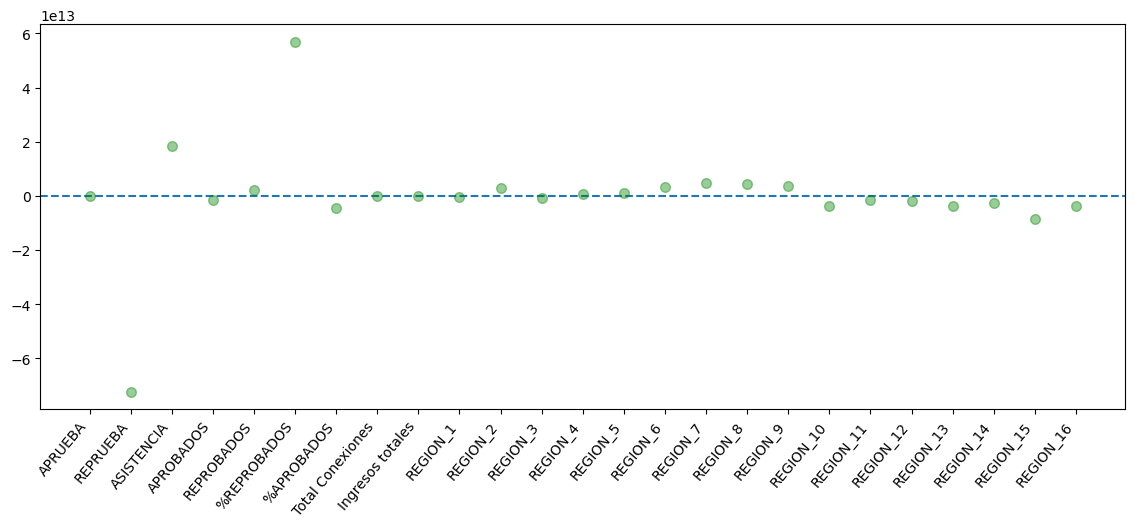

In [53]:
fig= plt.figure(figsize = (14, 5))
ax=fig.add_subplot(111)
ax.axhline(0, ls = '--')
ax.plot(linreg.coef_,alpha = 0.4, linestyle = 'none', marker= 'o', markersize = 7, color= 'green', label = 'Linear Regression')
ax.set_xticks(np.arange(len(X.columns)))
ax.set_xticklabels(X.columns)
plt.xticks(rotation=50, ha = 'right')
plt.show()


Al graficar los coeficientes podemos apreciar que el ingreso economico y el total de conexiones influyen de manera importante en el resultado de la predicción.

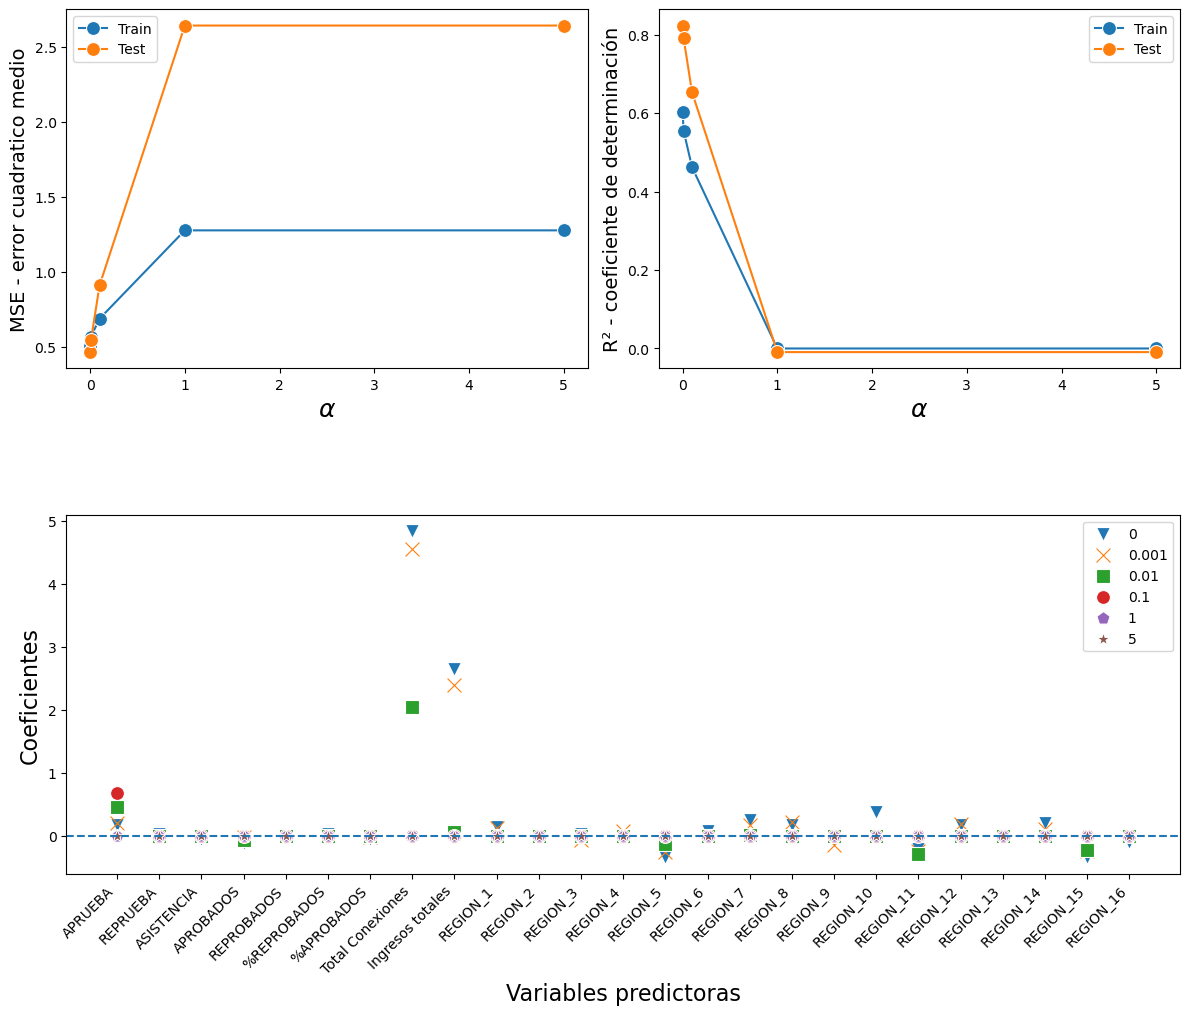

In [54]:
# párametro "alpha" de Lasso
alphas = [0, 0.001, 0.01, 0.1, 1, 5]

markers = ['v', 'x', 's', 'o', 'p', '*', '+', 'h', '^', 'd']

# listas que almacenaran los errores por iteración
MSE_trainL, R2_trainL = [], []
MSE_testL, R2_testL = [], []
i = 0

fig = plt.figure(figsize = (12, 14))
ax1 = plt.subplot2grid(shape = (3, 2), loc = (0, 0), colspan = 1)
ax2 = plt.subplot2grid(shape = (3, 2), loc = (0, 1), colspan = 1)
ax3 = plt.subplot2grid(shape = (3, 2), loc = (1, 0), colspan = 2)


for alpha in alphas:
    
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train_scaled, y_train)
    
    Y_predict_trainL = lasso.predict(X_train_scaled) # predicciones para datos de entrenamiento
    mse_trainL = mean_squared_error(y_train, Y_predict_trainL) # MSE
    r2_trainL = r2_score(y_train, Y_predict_trainL) # R2
    
    Y_predict_testL = lasso.predict(X_test_scaled) # predicciones para datos de prueba
    mse_testL = mean_squared_error(y_test, Y_predict_testL) # MSE
    r2_testL = r2_score(y_test, Y_predict_testL) # R2
    
    MSE_trainL.append(mse_trainL)
    MSE_testL.append(mse_testL)
    R2_trainL.append(r2_trainL)
    R2_testL.append(r2_testL)
    
    # gráfico de coeficientes
    sns.scatterplot(x = X.columns, y = lasso.coef_, ax = ax3, marker = markers[i], s = 100, label = f'{alpha}')
    
    i += 1

# gráfico de metricas de error para los datos de entrenamiento
sns.lineplot(x = alphas, y = MSE_trainL, ax = ax1, marker = 'o', markersize = 10, label = 'Train')
sns.lineplot(x = alphas, y = MSE_testL, ax = ax1, marker = 'o', markersize = 10, label = 'Test')

# gráfico de metricas de error para los datos de prueba
sns.lineplot(x = alphas, y = R2_trainL, ax = ax2, marker = 'o', markersize = 10, label = 'Train')
sns.lineplot(x = alphas, y = R2_testL, ax = ax2, marker = 'o', markersize = 10, label = 'Test')


# rotulación y cambio de formato
ax1.set_xlabel(r'$\alpha$', fontsize = 18)
ax1.set_ylabel('MSE - error cuadratico medio', fontsize = 14)

ax2.set_xlabel(r'$\alpha$', fontsize = 18)
ax2.set_ylabel('R\u00b2 - coeficiente de determinación', fontsize = 14)

ax3.axhline(0, ls = '--')
ax3.set_xlabel('Variables predictoras', fontsize = 16)
ax3.set_ylabel('Coeficientes', fontsize = 16)
ax3.set_xticklabels(X.columns, rotation = 45, ha = 'right')

plt.tight_layout()
plt.show()

In [55]:
GD_model = Lasso()
GridSL = GridSearchCV(estimator = GD_model, param_grid = dict(alpha = alphas))
GridSL.fit(X, Y)
print(f'Mejor rendimiento: {GridSL.best_score_}\nMejor alpha: {GridSL.best_estimator_.alpha}')

Mejor rendimiento: 0.5466892914331304
Mejor alpha: 0


Al intentar generar un modelo con regularización a través de Lasso, podemos apreciar que ha medida que aumenta el valor de la penalización, peor se vuelve el rendimiento. Al parecer el mejor modelo que se puede crear hasta ahora es aquel con penalización cero, es decir, una regresión multilineal simple como la del comienzo.

In [56]:
#X_2 = dataframe_2_v2.drop(['APRUEBA', 'REPRUEBA'], axis = 1)
X_2 = dataframe_2_v2.drop(['APRUEBA', 'REPRUEBA', '%APROBADOS', '%REPROBADOS', 'APROBADOS', 'REPROBADOS'], axis = 1)
Y_2 = dataframe_2_v2['APRUEBA']

column_transformer_1 = ColumnTransformer([('scaler', StandardScaler(), [col for col in X_2.columns \
if col not in cols_categoricas])],  remainder = 'passthrough')

X2_train, X2_test, y2_train, y2_test = train_test_split(X_2, Y_2, test_size = 0.3, random_state = 125)

# normalización de los datos
column_transformer_1.fit(X2_train)
X2_train_scaled = column_transformer_1.transform(X2_train)
X2_test_scaled = column_transformer_1.transform(X2_test)

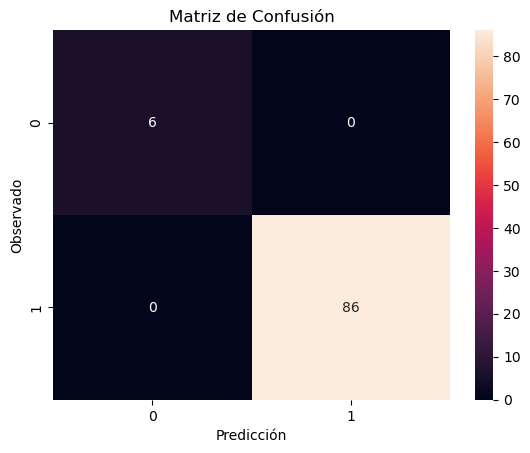

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        86

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92



In [57]:
logreg = LogisticRegression()
logreg.fit(X2_train_scaled, y2_train)

y2_pred_train = logreg.predict(X2_train_scaled)
y2_pred_test = logreg.predict(X2_test_scaled)

cf_matrix = confusion_matrix(y2_test, y2_pred_test)
sns.heatmap(cf_matrix, annot = True)
plt.xlabel('Predicción')
plt.ylabel('Observado')
plt.title('Matriz de Confusión')
plt.show()

report = classification_report(y2_test, y2_pred_test)
print(report)

Como se puede apreciar en la matriz de confusión, el modelo, al menos para el conjunto de datos dados, es capaz de clasificar con gran exactitud los datos de prueba, lo que indica que debe haber una gran relación entre la probabilidad de aprobar, y la región, los ingresos economicos, y el acceso a internet.

## Resumen de resultados

A partir del análisis de los datos, y en específico el modelo entrenado de regresión lineal, fue posible encontrar cierta influencia que ejercen los ingresos del hogar y las redes de internet fijas en el ámbito académico. Si bien existe una gran similitud entre el porcentaje de alumnos aprobados, el promedio con el que pasan de curso y la región en la que se encuentran, al aplicar regresión lineal para intentar predecir el rendimiento de un estudiante se puede notar que ambas variables le afectan considerablemente.

Teniendo esta afirmación como base para el resto de las conclusiones, es relevante mencionar las preguntas planteadas al inicio del proyecto, y revisitarlas de forma que puedan responderse o modificarse acorde a lo que todo el proyecto ha demostrado:

* ¿Cuáles son las regiones que presentan mayor desempeño académico y cuáles son las diferencias con las que tienen peor rendimiento? ¿Coincide lo anterior con el ingreso que estas presentan?

Las regiones con mejor desempeño académico son la región de Magallanes y la región de Aysén, mientras que las de peor rendimiento son las regiones de O'Higgins y Los Lagos. En comparación a los datos económicos que estas regiones presentan, la única región que es además una en la que las personas tienen mayores ingresos es la de Magallanes.

In [64]:
dataframe_sorted = dataframe.copy()
dataframe_sorted = dataframe_sorted.merge(dataframe_2[['PROMEDIO', 'REGION']].groupby('REGION').mean(), how = 'left', left_index = True, right_on = 'REGION')
dataframe_sorted.sort_values('PROMEDIO')

,REGION,Región,Ingresos totales,Total Conexiones,APROBADOS,REPROBADOS,%APROBADOS,%REPROBADOS,PROMEDIO
10.0,10,X,8.001562e+05,140033,44302.0,2437.0,94.785939,5.214061,5.492892
6.0,6,VI,7.830949e+05,157323,47991.0,1322.0,97.319165,2.680835,5.594310
3.0,3,III,8.918012e+05,58053,15810.0,481.0,97.047450,2.952550,5.602717
9.0,9,IX,6.865989e+05,146334,52506.0,1637.0,96.976525,3.023475,5.608761
14.0,14,XIV,7.512811e+05,63359,20461.0,612.0,97.095810,2.904190,5.608833
2.0,2,II,1.110884e+06,163835,32874.0,577.0,98.275089,1.724911,5.628958
13.0,13,RM,1.204524e+06,1937201,334844.0,6196.0,98.183204,1.816796,5.672692
5.0,5,V,8.303637e+05,447729,87942.0,1367.0,98.469359,1.530641,5.710390
4.0,4,IV,7.519408e+05,157504,40225.0,444.0,98.908259,1.091741,5.712520
1.0,1,I,9.695093e+05,75556,18673.0,292.0,98.460322,1.539678,5.724271


* ¿Se puede decir que hay una relación lineal entre ambas variables?

Si bien existen ciertas similitudes en cuanto a los bienes y el rendimiento, no es posible decir que tienen una relación estrictamente lineal. Un ejemplo de esto es la región de Tarapacá, que a pesar de estar entre las de peor desempeño, es de las que más ingresos tiene. 

* ¿Se puede afirmar que el acceso a internet y los ingresos económicos influyen en los estudiantes?

Ya hemos dicho que la relación entre variables no es tan simple como parecería ser, pero aun así se puede observar una gran influencia entre ellas, como se pudo apreciar en los gráficos de los coeficientes de la regresión lineal, el ingreso económico tenia un gran efecto en la predicción final. De todas formas, es bastante probable que de todos las variables que han afectado a los estudiantes durante estos años, estos sean de los más notorios. Cabe mencionar, además, que a lo largo del análisis se hizo notoria la variable de asistencia, (cantidad de veces que el alumnado estaba en sus clases), pudiendose ver que esta era un factor importante al momento de predecir en el desempeño del estudiante.

* ¿Existe alguna conexión además entre el acceso a internet y los ingresos económicos?

Existen ciertas coincidencias entre las regiones con más ingresos y la cantidad de redes fijas disponibles, como la Región Metropolinana, pero al existir regiones como la de Aysén que tiene buenos ingresos y pocas redes, no se puede afirmar con certeza que estén vinculadas.


* ¿Se puede predecir el desempeño del próximo año a partir de lo observado?

El modelo final podria ser utilizado como guia para armar ciertas expectactivas respecto al rendimiento del año siguiente, pero como señalan las metricas de error, las predicciones no son del todo exactas, por lo que en el caso de que se necesiten resultados certeros, deberia de entrenarse un modelo nuevo con una mayor cantidad de variables predictoras, o con un grupo de variables distinto al usado en este proyecto. 

Una posible forma de mejorar el rendimiento del modelo podria ser utilizar el equivalente de las variables predictoras utilizadas en este trabajo, enfocandose en las comunas y no en la región, pues datos generados a partir de esta última son por naturaleza, menos especificos que los comunales.

